In [1]:
using DrWatson
@quickactivate "Doran_etal_2022"

using CSV, DataFrames
using PhyML_jll
include(srcdir("helpers.jl"))

compose (generic function with 1 method)

In [2]:
ddir = datadir("exp_raw", "BB669")

"/Users/bend/projects/Doran_etal_2022/data/exp_raw/BB669"

In [3]:
idsdf = CSV.read(joinpath(ddir, "Acc_list.BBIDS_669.csv"), DataFrame);
sdf = CSV.read(joinpath(ddir, "biobank16s.seq_tax.csv"), DataFrame);

In [5]:
# missing 1 seq id
bb660_16sdf = hcat(DataFrame(msk_id=idsdf.msk_id[1:end-1]), sdf[filter(!isnothing, indexin(idsdf.seq_id, sdf.seq_id)), [:seq_id, :nuc_sequence]]);

In [9]:
bb660_16sdf.nuc_sequence[1] |> length

1521

In [8]:
unique(bb660_16sdf.nuc_sequence)

335-element Vector{String}:
 "ATGGAGAGTTTGATCCTGGCTCAGGATGAA" ⋯ 1461 bytes ⋯ "ACCGGAAGGTGCGGCTGGAACACCTCCTTT"
 "GACCGGCGCACGGGTGCGTAACGCGTATGC" ⋯ 1367 bytes ⋯ "ACCGGAAGGTGCGGCTGGAACACCTCCTTT"
 "ATGGAGAGTTTGATCCTGGCTCAGGATGAA" ⋯ 1465 bytes ⋯ "ACCGGAAGGTGCGGCTGGAACACCTCCTTT"
 "ATGGAGAGTTTGATCCTGGCTCAGGATGAA" ⋯ 1461 bytes ⋯ "ACCGGAAGGTGCGGCTGGAACACCTCCTTT"
 "ATGGAGAGTTTGATCCTGGCTCAGGATGAA" ⋯ 1464 bytes ⋯ "ACCGGAAGGTGCGGCTGGAACACCTCCTTT"
 "ATGAGAGTTTGATCCTGGCTCAGGATGAAC" ⋯ 1470 bytes ⋯ "ATCGGAAGGTGCGGCTGGATCACCTCCTTT"
 "ATGAGAGTTTGATCCTGGCTCAGGATGAAC" ⋯ 1470 bytes ⋯ "ATCGGAAGGTGCGGCTGGATCACCTCCTTT"
 "ATGAGAGTTTGATCCTGGCTCAGGATGAAC" ⋯ 1470 bytes ⋯ "ATCGGAAGGTGCGGCTGGATCACCTCCTTT"
 "ATGAGAGTTTGATCCTGGCTCAGGATGAAC" ⋯ 1469 bytes ⋯ "ATCGGAAGGTGCGGCTGGATCACCTCCTTT"
 "ATGAGAGTTTGATCCTGGCTCAGGATGAAC" ⋯ 1469 bytes ⋯ "ATCGGAAGGTGCGGCTGGATCACCTCCTTT"
 ⋮
 "AGAGTTTGATCCTGGCTCAGGATGAACGCT" ⋯ 1464 bytes ⋯ "ATCGGAAGGTGCGGCTGGATCACCTCCTTT"
 "TCCTACGGGAGGCAGCAGTGGGGAATATTG" ⋯ 1118 bytes ⋯ "ATCGGAAGGTGCGGCTG

In [26]:
writefasta(joinpath(ddir, "BB669_16S.faa"), bb660_16sdf.msk_id, bb660_16sdf.nuc_sequence)

In [27]:
infile = joinpath(ddir, "BB669_16S.faa")
alnfile = joinpath(ddir, "BB669_16S.aln")
run(pipeline(`mafft $infile`, stdout=alnfile))

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0


stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..


    1 / 668

  101 / 668

  201 / 668

  301 / 668

  401 / 668

  601 / 668
done.

Constructing a UPGMA tree (efffree=0) ... 
  660 / 668
done.

Progressive alignment 1/2... 
STEP     7 / 667  f

STEP    29 / 667  f

STEP    48 / 667  f

STEP    78 / 667  f

STEP   106 / 667  f

STEP   131 / 667  f

STEP   154 / 667  f

STEP   173 / 667  f

STEP   200 / 667  f

STEP   230 / 667  f

STEP   249 / 667  f

STEP   275 / 667  f

STEP   299 / 667  f

STEP   329 / 667  f

STEP   350 / 667  f

STEP   372 / 667  f

STEP   400 / 667  f

STEP   427 / 667  f

STEP   437 / 667  f

STEP   449 / 667  f

STEP   457 / 667  f

STEP   468 / 667  f

STEP   488 / 667  f

STEP   501 / 667  f

STEP   601 / 667  f


Reallocating..done. *alloclen = 4090



done.

Making a distance matrix from msa.. 
    0 / 668

  100 / 668

  200 / 668

  300 / 668

  400 / 668

  500 / 668

  600 / 668
done.

Constructing a UPGMA tree (efffree=1) ... 
  660 / 668
done.

Progressive alignment 2/2... 
STEP    15 / 667  f

STEP    47 / 667  f

STEP    81 / 667  f

STEP   110 / 667  f

STEP   137 / 667  f

STEP   170 / 667  f

STEP   198 / 667  f

STEP   228 / 667  f

STEP   260 / 667  f

STEP   287 / 667  f

STEP   320 / 667  f

STEP   338 / 667  f

STEP   357 / 667  f

STEP   380 / 667  f

STEP   408 / 667  f

STEP   429 / 667  f

STEP   452 / 667  f

STEP   477 / 667  f

STEP   499 / 667  f

STEP   501 / 667  f

STEP   601 / 667  f


Reallocating..done. *alloclen = 4088



done.

disttbfast (nuc) Version 7.511
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previous versions.
To disable this change, add the --leavegappyregion option.



Process(`mafft /Users/ben/projects/Doran_etal_2022/data/exp_raw/BB669/BB669_16S.faa`, ProcessExited(0))

In [37]:
alndf = readfasta(alnfile)
writephylip(joinpath(ddir, "BB669_16S.phy"), alndf.sequence, alndf.label)

In [40]:
inputfile = joinpath(ddir, "BB669_16S.phy")
outputdir = projectdir("_research", "BB669_16S_phyml") |> mkpath

cp(inputfile, joinpath(outputdir, basename(inputfile)), force=true)
    
@info "Starting PhyML on BB669_16S"
# general JTT
@time begin
    run(pipeline(`$(phyml()) \
        -dnt -mHKY85 -fe \
        -i $(joinpath(outputdir, basename(inputfile))) \
        -o tlr \
        --search SPR \
        --r_seed 123456 \
        --rand_start \
        --n_rand_starts 3 \
        --no_memory_check \
        --bootstrap -4`, # SH like branch supports
    stdout=joinpath(outputdir, "BB669_16S" * "_phyml.out")))
end # time phyml

mv(joinpath(outputdir, basename(inputfile) * "_phyml_tree.txt"),
   joinpath(outputdir, basename(inputfile) * "-supporttree.txt")
)

┌ Info: Starting PhyML on BB669_16S
└ @ Main /Users/ben/projects/Doran_etal_2022/notebooks/reports/26_16Stree.ipynb:6


6391.828125 seconds (218.60 k allocations: 7.032 MiB, 0.00% gc time, 0.00% compilation time)


"/Users/ben/projects/Doran_etal_2022/_research/BB669_16S_phyml/BB669_16S.phy-supporttree.txt"

In [46]:
using NewickTree, NewickTreeTools
using StatsPlots
function ladderize!(t; rev=false)
    function walk!(n)
        if isleaf(n)
            return 1
        else 
            numleaves = [walk!(c) for c in children(n)]
            n.children .= n.children[sortperm(numleaves, rev=rev)]
            return sum(numleaves)
        end        
    end
    walk!(t)
end

ladderize! (generic function with 1 method)

In [47]:
tree = readnw(readline(joinpath(outputdir, basename(inputfile) * "-supporttree.txt")));
ladderize!(tree)

668

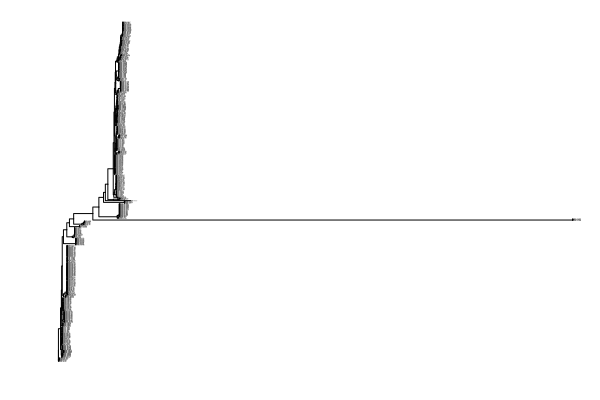

In [49]:
plot(tree, fs=1)

In [59]:
writenw(joinpath(outputdir, basename(inputfile) * "-supporttree_multi.txt"), as_polytomy(n->NewickTree.support(n)<.5, tree))

14895

In [58]:
map(prewalk(tree)) do node
    NewickTree.support(node)>0.5
end

1334-element Vector{Bool}:
 0
 0
 0
 0
 1
 0
 0
 0
 1
 0
 ⋮
 0
 0
 0
 0
 1
 0
 0
 0
 0